In [1]:
import matplotlib.pyplot as plt
import numpy as np
import focusfield as ff

In [2]:
# Define system for red color
opt_red = ff.Optics(
    na=1.42,
    magnification=60,
    f_tube_lens=180e-3,
    n_lens=1.518,
    n_media=1.518,
    n_sample=1.518,
    fill_factor=1.72,
    wavelength=635e-9,
    power=1e-3,
)

# Define system for green color
opt_green = ff.Optics(
    na=1.42,
    magnification=60,
    f_tube_lens=180e-3,
    n_lens=1.518,
    n_media=1.518,
    n_sample=1.518,
    fill_factor=1.72,
    wavelength=561e-9,
    power=1e-3,
)

# Our real magnification is larger because we are using a 300mm lens for tube lens...
spc = ff.Spaces(
    opt=opt_red,
    rng_x=1500e-9,
    rng_y=1500e-9,
    rng_z=1500e-9,
    dr=20e-9,
    dz=20e-9,
)

2025-02-21 13:39:54 nbw-imp-368 focusfield.spaces[21480] DEBUG Calculate spaces
2025-02-21 13:39:54 nbw-imp-368 focusfield.spaces[21480] DEBUG Condition: n1 > n2


# Halfmoon in x - Polarization in X

2025-02-21 13:39:54 nbw-imp-368 focusfield.fieldin[21480] DEBUG Calculate input field


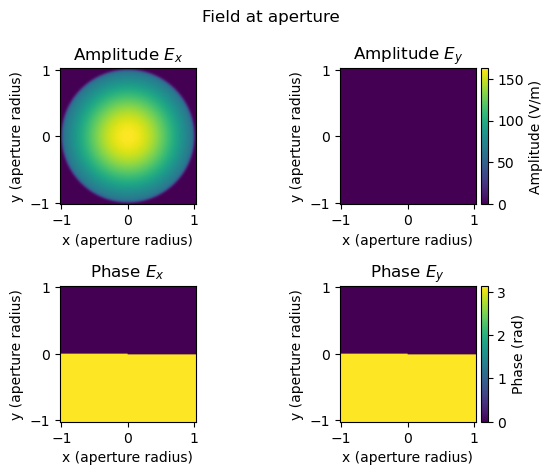

2025-02-21 13:39:54 nbw-imp-368 focusfield.fieldin[21480] DEBUG Calculate input field
2025-02-21 13:39:54 nbw-imp-368 focusfield.calculator[21480] INFO Start field calculation
100%|██████████| 77/77 [00:00<00:00, 124.61it/s]


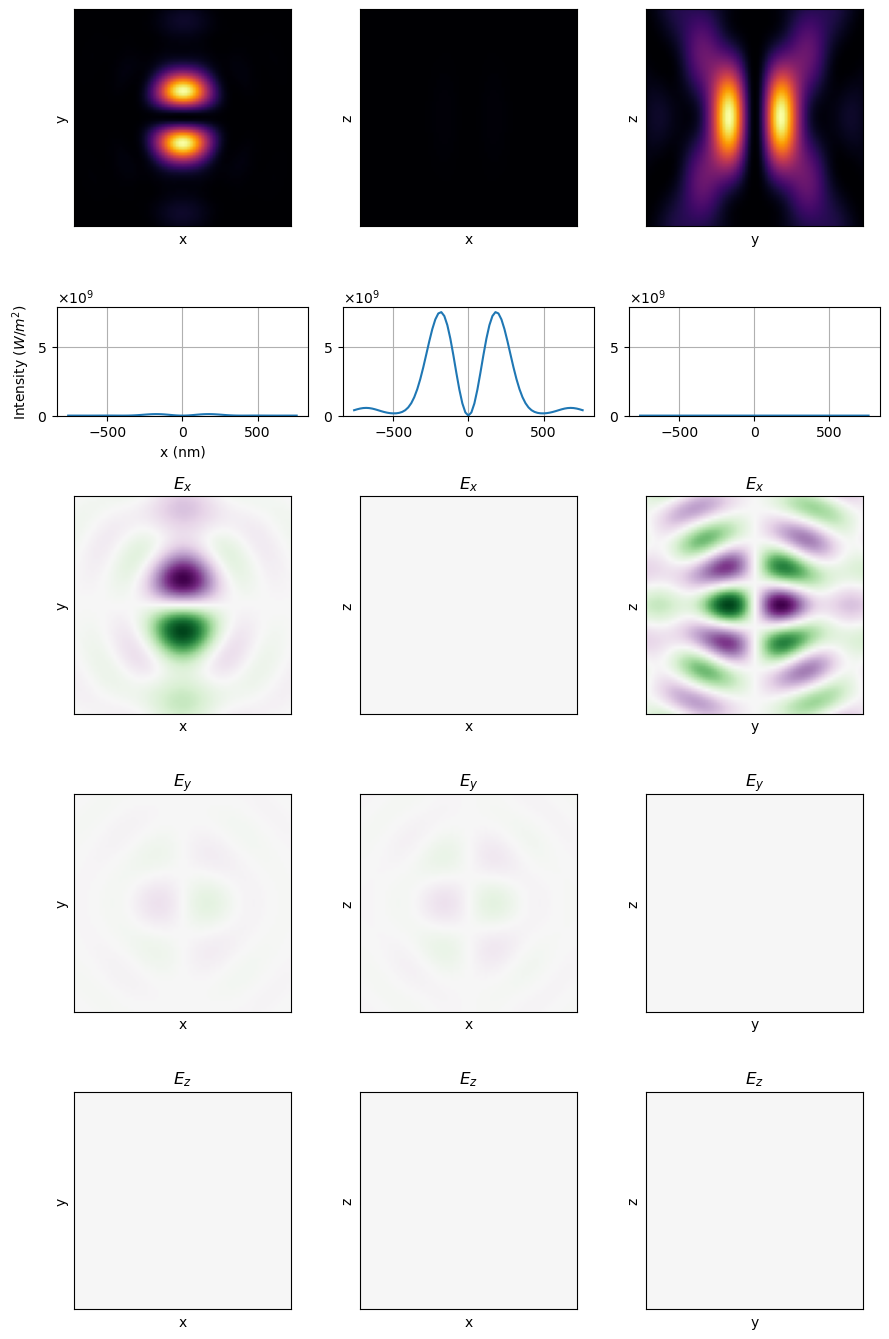

(<Figure size 900x1350 with 15 Axes>,
 array([[<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='x', ylabel='z'>,
         <Axes: xlabel='y', ylabel='z'>],
        [<Axes: xlabel='x (nm)', ylabel='Intensity $(W/m^2)$'>, <Axes: >,
         <Axes: >],
        [<Axes: title={'center': '$E_x$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_x$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_x$'}, xlabel='y', ylabel='z'>],
        [<Axes: title={'center': '$E_y$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_y$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_y$'}, xlabel='y', ylabel='z'>],
        [<Axes: title={'center': '$E_z$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_z$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_z$'}, xlabel='y', ylabel='z'>]],
       dtype=object),
 <focusfield.fieldplot.Plotter at 0x24ad78f6850>)

In [3]:
fldin = ff.FieldIn(spc)
fldin += ff.fieldmod.Initialize(polarization=ff.Polarization.X)
fldin += ff.fieldmod.Gauss(w_diameter=1.0)
fldin += ff.fieldmod.Halfmoon(angle=0)
fldin.calculate()
fldin.plot()
fldout = ff.calculate_focus(fldin)
fldout.plot(i_profile=True, e_image=True)#, e_profile=True)

# Halfmoon in x - Polarization in Y

2025-02-21 13:39:56 nbw-imp-368 focusfield.fieldin[21480] DEBUG Calculate input field


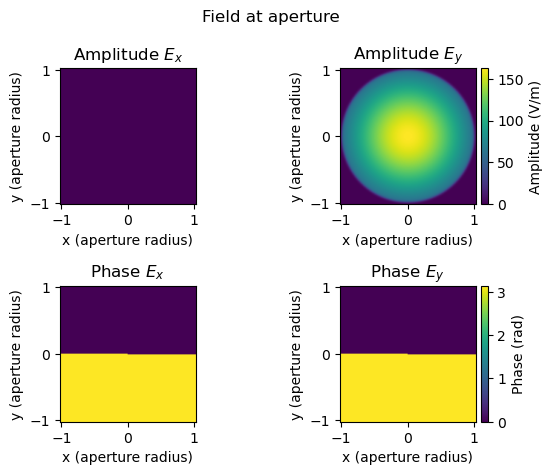

2025-02-21 13:39:56 nbw-imp-368 focusfield.fieldin[21480] DEBUG Calculate input field
2025-02-21 13:39:56 nbw-imp-368 focusfield.calculator[21480] INFO Start field calculation
100%|██████████| 77/77 [00:00<00:00, 148.29it/s]


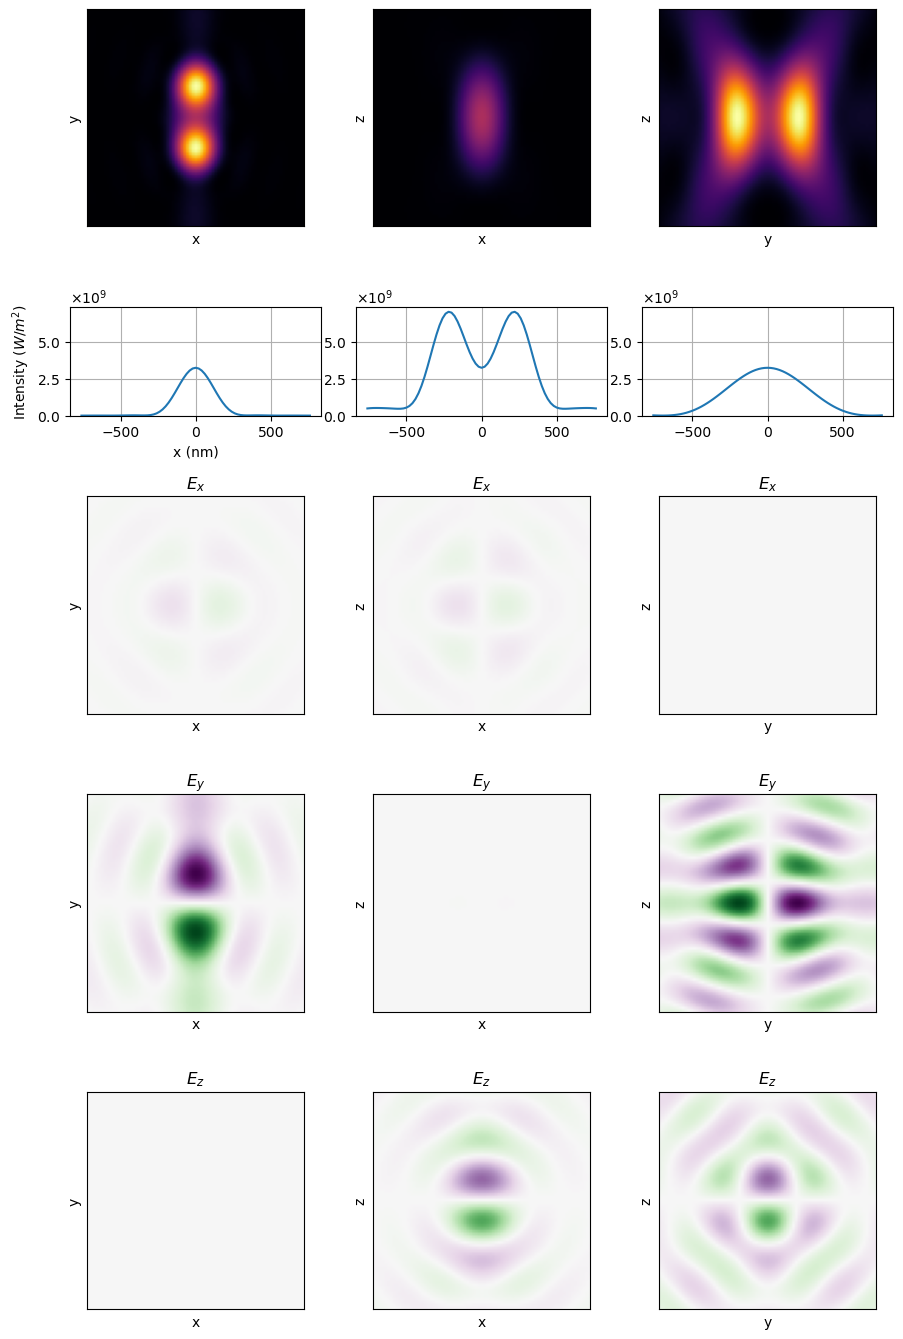

(<Figure size 900x1350 with 15 Axes>,
 array([[<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='x', ylabel='z'>,
         <Axes: xlabel='y', ylabel='z'>],
        [<Axes: xlabel='x (nm)', ylabel='Intensity $(W/m^2)$'>, <Axes: >,
         <Axes: >],
        [<Axes: title={'center': '$E_x$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_x$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_x$'}, xlabel='y', ylabel='z'>],
        [<Axes: title={'center': '$E_y$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_y$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_y$'}, xlabel='y', ylabel='z'>],
        [<Axes: title={'center': '$E_z$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_z$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_z$'}, xlabel='y', ylabel='z'>]],
       dtype=object),
 <focusfield.fieldplot.Plotter at 0x24adb655490>)

In [4]:
fldin = ff.FieldIn(spc)
fldin += ff.fieldmod.Initialize(polarization=ff.Polarization.Y)
fldin += ff.fieldmod.Gauss(w_diameter=1.0)
fldin += ff.fieldmod.Halfmoon(angle=0)
fldin.calculate()
fldin.plot()
fldout = ff.calculate_focus(fldin)
fldout.plot(i_profile=True, e_image=True)#, e_profile=True)

# Dielectric mirrors

- The Ellipticity changes due to the dielectric mirror at 45 degrees, from measurements during a rotation of +/- 0.8mrad, is max. 0.3 degree @635nm, and max. 0.6 degree @561nm.

- All the consider polarizations will be linear. This means $\phi = 0$

The Stokes parameters are defined as:

$
S_0 = |E_x|^2 + |E_y|^2
$

$
S_1 = |E_x|^2 - |E_y|^2
$

$
S_2 = 2 \text{Re}(E_x E_y^*)
$

$
S_3 = 2 \text{Im}(E_x E_y^*)
$

For the Jones vector 

$\mathbf{E} = \begin{pmatrix} \cos \alpha \\ \sin \alpha \, e^{j \phi} \end{pmatrix}$

The Stokes parameters become:

$
S_0 = \cos^2 \alpha + \sin^2 \alpha = 1
$

$
S_1 = \cos^2 \alpha - \sin^2 \alpha = \cos 2\alpha
$

$
S_2 = 2 \cos \alpha \cdot \sin \alpha \cos \phi = \sin 2\alpha \cos \phi
$

$
S_3 = 2 \cos \alpha \cdot \sin \alpha \sin \phi = \sin 2\alpha \sin \phi
$

The Stokes parameters are related to the **azimuth angle** ($\psi$) and the **ellipticity angle** ($\chi$) by:

$
\tan 2\psi = \frac{S_2}{S_1}
$

$
\sin 2\chi = \frac{S_3}{S_0}
$

Using the stoke parameter's previous definition

$
\tan 2\psi = \frac{S_2}{S_1} = \frac{\sin 2\alpha \cos \phi}{\cos 2\alpha}
$

Simplify:

$
\tan 2\psi = \tan 2\alpha \cos \phi
$

$
\sin 2\chi = \frac{S_3}{S_0} = \sin 2\alpha \sin \phi
$


In [96]:
# variables
number_of_mirrors = 7
delta_per_mirror_in_rad = 0.5*np.pi/180

_spc = ff.Spaces(
    opt=opt_red,
    rng_x=400e-9,
    rng_y=400e-9,
    rng_z=400e-9,
    dr=10e-9,
    dz=10e-9
)

fldout = []
beams_different_ellipticities = []
for _mirror in range(number_of_mirrors):
    fldin = ff.FieldIn(_spc)
    fldin += ff.fieldmod.Initialize(alpha=_mirror*delta_per_mirror_in_rad, phi=0)
    fldin += ff.fieldmod.Gauss(w_diameter=1.0)
    fldin += ff.fieldmod.Halfmoon(angle=0)
    _fldout = ff.calculate_focus(fldin)
    fldout.append(_fldout)
    beams_different_ellipticities.append(_fldout.intensity)
beams_different_ellipticities = np.array(beams_different_ellipticities)

2025-02-21 15:16:36 nbw-imp-368 focusfield.spaces[21480] DEBUG Calculate spaces
2025-02-21 15:16:36 nbw-imp-368 focusfield.spaces[21480] DEBUG Condition: n1 > n2
2025-02-21 15:16:36 nbw-imp-368 focusfield.fieldin[21480] DEBUG Calculate input field
2025-02-21 15:16:36 nbw-imp-368 focusfield.calculator[21480] INFO Start field calculation
100%|██████████| 41/41 [00:00<00:00, 1139.67it/s]
2025-02-21 15:16:36 nbw-imp-368 focusfield.fieldin[21480] DEBUG Calculate input field
2025-02-21 15:16:36 nbw-imp-368 focusfield.calculator[21480] INFO Start field calculation
100%|██████████| 41/41 [00:00<00:00, 1648.39it/s]
2025-02-21 15:16:36 nbw-imp-368 focusfield.fieldin[21480] DEBUG Calculate input field
2025-02-21 15:16:36 nbw-imp-368 focusfield.calculator[21480] INFO Start field calculation
100%|██████████| 41/41 [00:00<00:00, 1028.43it/s]
2025-02-21 15:16:36 nbw-imp-368 focusfield.fieldin[21480] DEBUG Calculate input field
2025-02-21 15:16:36 nbw-imp-368 focusfield.calculator[21480] INFO Start fi

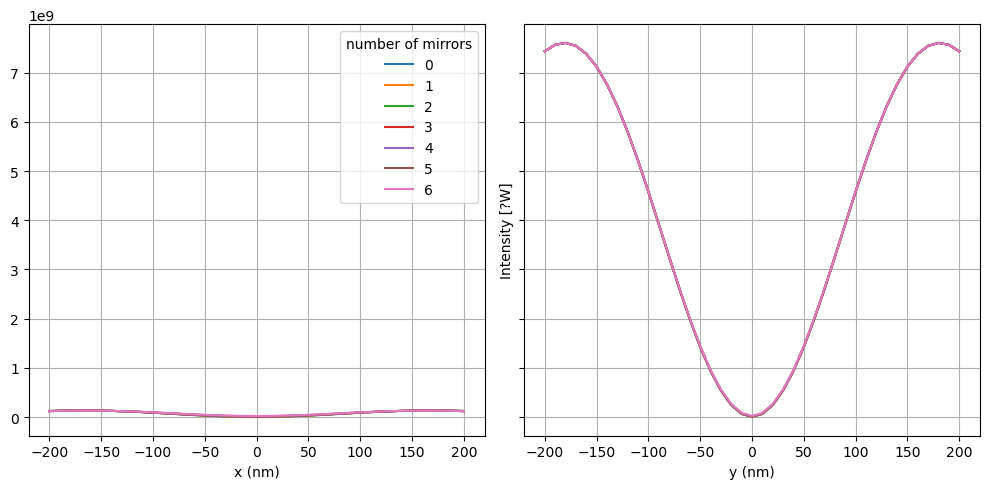

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


axs[0].plot(
    _fldout.x * 1e9,
    np.squeeze(beams_different_ellipticities[:, :, _fldout.y == 0, _fldout.z == 0]).T,
)
axs[0].legend([f"{e}" for e in range(number_of_mirrors)], title="number of mirrors", loc="upper right")
axs[0].set_xlabel("x (nm)")
axs[0].grid()

axs[1].plot(
    _fldout.y * 1e9,
    np.squeeze(beams_different_ellipticities[:, _fldout.x == 0, :, _fldout.z == 0]).T,
)
axs[1].set_xlabel("y (nm)")
axs[1].set_ylabel("Intensity [?W]")
axs[1].grid()

plt.tight_layout()
plt.show()

# Metallic mirrors

Now we check the zero quality when the beam power is reduced by 5% each mirror (metallic mirror scenario)

In [110]:
fldout = []
beams_different_powers = []
for _mirror in range(number_of_mirrors):

    _opt= ff.Optics(
        na=1.42,
        magnification=60,
        f_tube_lens=180e-3,
        n_lens=1.518,
        n_media=1.518,
        n_sample=1.518,
        fill_factor=1.72,
        wavelength=635e-9,
        power=(100-(5*_mirror))*1e-5,
    )
        
    _spc = ff.Spaces(
        opt=_opt,
        rng_x=400e-9,
        rng_y=400e-9,
        rng_z=400e-9,
        dr=10e-9,
        dz=10e-9
    )

    fldin = ff.FieldIn(_spc)
    fldin += ff.fieldmod.Initialize(alpha=0, phi=_mirror*np.pi/2)
    fldin += ff.fieldmod.Gauss(w_diameter=1.0)
    fldin += ff.fieldmod.Halfmoon(angle=0)
    _fldout = ff.calculate_focus(fldin)
    fldout.append(_fldout)
    beams_different_powers.append(_fldout.intensity)
beams_different_powers = np.array(beams_different_powers)


2025-02-21 15:56:25 nbw-imp-368 focusfield.spaces[21480] DEBUG Calculate spaces
2025-02-21 15:56:25 nbw-imp-368 focusfield.spaces[21480] DEBUG Condition: n1 > n2
2025-02-21 15:56:25 nbw-imp-368 focusfield.fieldin[21480] DEBUG Calculate input field
2025-02-21 15:56:25 nbw-imp-368 focusfield.calculator[21480] INFO Start field calculation
100%|██████████| 41/41 [00:00<00:00, 914.34it/s]
2025-02-21 15:56:25 nbw-imp-368 focusfield.spaces[21480] DEBUG Calculate spaces
2025-02-21 15:56:25 nbw-imp-368 focusfield.spaces[21480] DEBUG Condition: n1 > n2
2025-02-21 15:56:25 nbw-imp-368 focusfield.fieldin[21480] DEBUG Calculate input field
2025-02-21 15:56:25 nbw-imp-368 focusfield.calculator[21480] INFO Start field calculation
100%|██████████| 41/41 [00:00<00:00, 932.33it/s]
2025-02-21 15:56:25 nbw-imp-368 focusfield.spaces[21480] DEBUG Calculate spaces
2025-02-21 15:56:25 nbw-imp-368 focusfield.spaces[21480] DEBUG Condition: n1 > n2
2025-02-21 15:56:25 nbw-imp-368 focusfield.fieldin[21480] DEBUG 

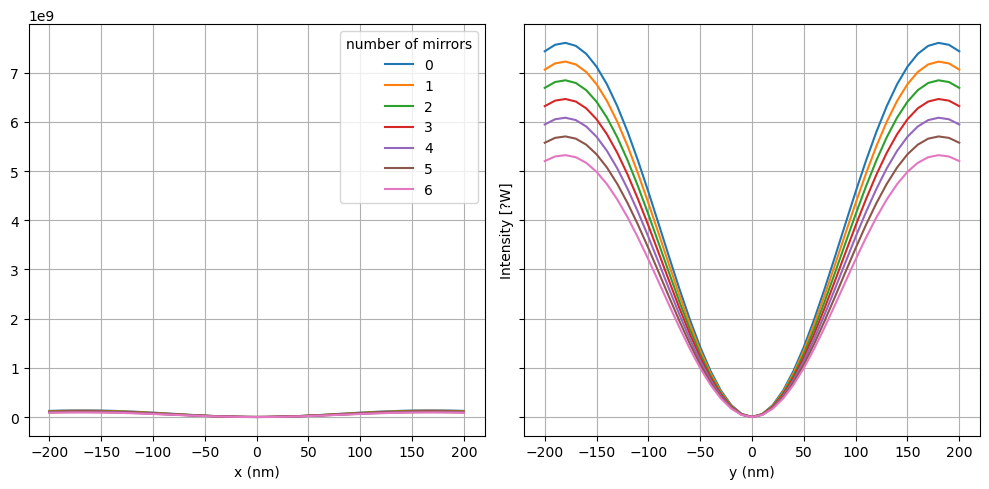

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


axs[0].plot(
    _fldout.x * 1e9,
    np.squeeze(beams_different_powers[:, :, _fldout.y == 0, _fldout.z == 0]).T,
)
axs[0].legend([f"{e}" for e in range(number_of_mirrors)], title="number of mirrors", loc="upper right")
axs[0].set_xlabel("x (nm)")
axs[0].grid()

axs[1].plot(
    _fldout.y * 1e9,
    np.squeeze(beams_different_powers[:, _fldout.x == 0, :, _fldout.z == 0]).T,
)
axs[1].set_xlabel("y (nm)")
axs[1].set_ylabel("Intensity [?W]")
axs[1].grid()

plt.tight_layout()
plt.show()

# Normalize power

The main interest is y-component cero comparisson w.r.t. the maximum intensity at a given distance. Let's normalize as $\frac{Intensity(y)}{min(Intensity)}$

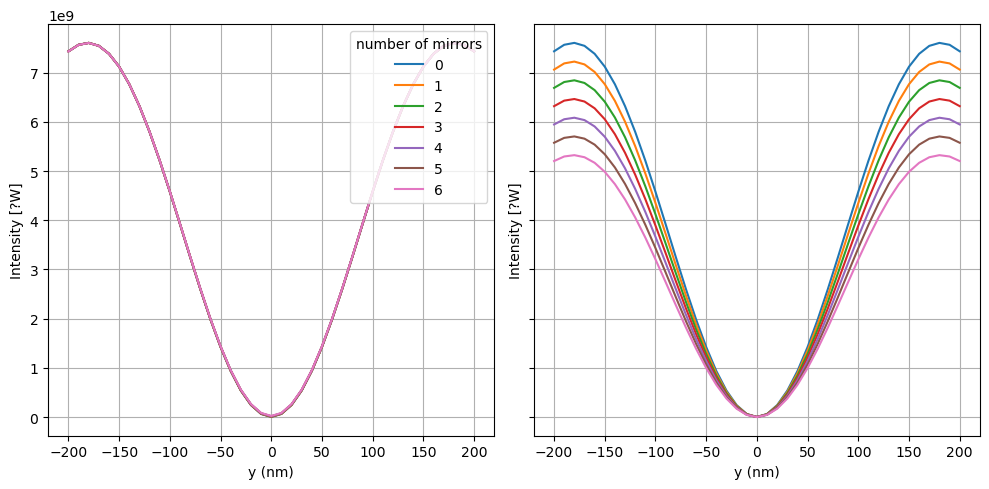

In [112]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot of intensities for different ellipticities
axs[0].plot(
    _fldout.y * 1e9,
    np.squeeze(beams_different_ellipticities[:, _fldout.x == 0, :, _fldout.z == 0]).T,
)
axs[0].legend([f"{e}" for e in range(number_of_mirrors)], title="number of mirrors", loc="upper right")
axs[0].set_xlabel("y (nm)")
axs[0].set_ylabel("Intensity [?W]")
axs[0].grid()


# Plot of intensities for different input power
axs[1].plot(
    _fldout.y * 1e9,
    np.squeeze(beams_different_powers[:, _fldout.x == 0, :, _fldout.z == 0]).T,
)
axs[1].set_xlabel("y (nm)")
axs[1].set_ylabel("Intensity [?W]")
axs[1].grid()

plt.tight_layout()
plt.show()

In [113]:
beams_different_ellipticities_norm = []

for _mirror in range(number_of_mirrors):
    min_intensity_value = np.squeeze(beams_different_ellipticities[:, _fldout.x == 0, :, _fldout.z == 0])[_mirror].min()
    _beams_different_ellipticities_norm = np.squeeze(beams_different_ellipticities[:, _fldout.x == 0, :, _fldout.z == 0])[_mirror] / min_intensity_value
    beams_different_ellipticities_norm.append(_beams_different_ellipticities_norm)

beams_different_ellipticities_norm = np.array(beams_different_ellipticities_norm)

beams_different_powers_norm = []

for _mirror in range(number_of_mirrors):
    min_intensity_value = np.squeeze(beams_different_powers[:, _fldout.x == 0, :, _fldout.z == 0])[_mirror].min()
    _beams_different_powers_norm = np.squeeze(beams_different_powers[:, _fldout.x == 0, :, _fldout.z == 0])[_mirror] / min_intensity_value
    beams_different_powers_norm.append(_beams_different_powers_norm)

beams_different_powers_norm = np.array(beams_different_powers_norm)


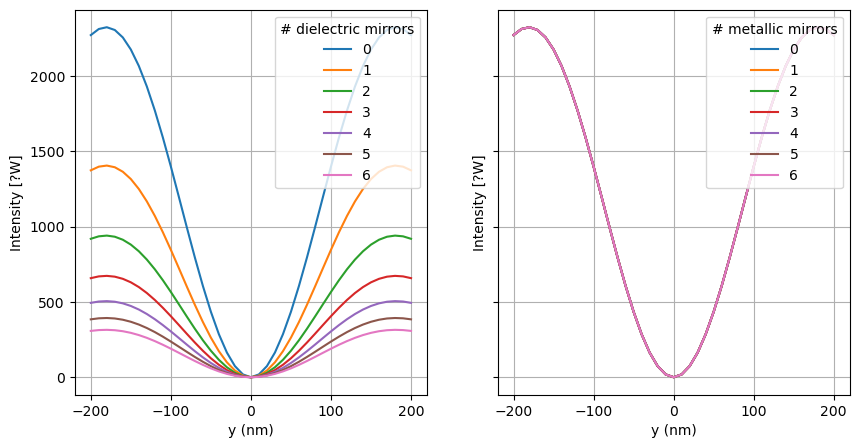

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot of normalized intensities for different ellipticities
axs[0].plot(
    _fldout.y * 1e9,
    beams_different_ellipticities_norm.T,
)
axs[0].legend([f"{e}" for e in range(number_of_mirrors)], title="# dielectric mirrors", loc="upper right")
axs[0].set_xlabel("y (nm)")
axs[0].set_ylabel("Intensity [?W]")
axs[0].grid()

# Plot of normalized intensities for different powers
axs[1].plot(
    _fldout.y * 1e9,
    beams_different_powers_norm.T,
)
axs[1].legend([f"{e}" for e in range(number_of_mirrors)], title="# metallic mirrors", loc="upper right")
axs[1].set_xlabel("y (nm)")
axs[1].set_ylabel("Intensity [?W]")
axs[1].grid()

#plt.tight_layout()
plt.show()

# Conclusion

- More metallic mirrors create a decrease in the peaks of the donut in y-coordinate. However, losing power in the peaks, means also loosing power in the minima, which allows to have a consistent ratio of power w.r.t. the minima

- When normalized w.r.t. the minima, it looks like including dielectric mirror might have a more negative effect in the power ratio of intensity in one point in the y-coordinate vs de minima, in comparison with using metallic mirrors. This might imply a better strategy is to use metallic mirrors, eventhough we have larger power losses.